Training the SVM Regressor using dlib

In [ ]:
import os
import cv2
import numpy as np
import dlib
import scipy.io
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Initialize dlib's face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Function to detect facial landmarks from an image
def get_landmarks(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 1)
    
    if len(rects) > 0:
        # Assuming one face per image
        shape = predictor(gray, rects[0])
        landmarks = np.array([[p.x, p.y] for p in shape.parts()])
        return landmarks.flatten()  # Flatten the landmarks into a 1D array
    else:
        return None

# Function to load data and extract features and labels
def load_data_and_extract_features(directory):
    X = []  # Feature vectors (landmarks)
    y_pitch = []  # Pitch angles
    y_yaw = []  # Yaw angles
    y_roll = []  # Roll angles
    
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            image_path = os.path.join(directory, filename)
            mat_path = os.path.join(directory, filename.replace('.jpg', '.mat'))
            
            # Check if the corresponding .mat file exists
            if os.path.exists(mat_path):
                image = cv2.imread(image_path)
                landmarks = get_landmarks(image)
                
                if landmarks is not None:
                    X.append(landmarks)
                    
                    # Load the ground truth values from the .mat file
                    mat_data = scipy.io.loadmat(mat_path)
                    pose_params = mat_data['Pose_Para'][0][:3]  # Pitch, Yaw, Roll
                    
                    y_pitch.append(pose_params[0])
                    y_yaw.append(pose_params[1])
                    y_roll.append(pose_params[2])
                    
    return np.array(X), np.array(y_pitch), np.array(y_yaw), np.array(y_roll)

# Directory containing the images and mat files
directory = '/home/ahmed/Documents/GitHub/NTI-face-pose-statment-1/DataSet'

# Load data and extract features
X, y_pitch, y_yaw, y_roll = load_data_and_extract_features(directory)

# Split data into training and testing sets
X_train, X_test, y_pitch_train, y_pitch_test = train_test_split(X, y_pitch, test_size=0.2, random_state=42)
_, _, y_yaw_train, y_yaw_test = train_test_split(X, y_yaw, test_size=0.2, random_state=42)
_, _, y_roll_train, y_roll_test = train_test_split(X, y_roll, test_size=0.2, random_state=42)

# Initialize SVM regressors for each angle
svr_pitch = SVR(kernel='rbf')
svr_yaw = SVR(kernel='rbf')
svr_roll = SVR(kernel='rbf')

# Train the regressors
svr_pitch.fit(X_train, y_pitch_train)
svr_yaw.fit(X_train, y_yaw_train)
svr_roll.fit(X_train, y_roll_train)

# Predict on the test set
y_pitch_pred = svr_pitch.predict(X_test)
y_yaw_pred = svr_yaw.predict(X_test)
y_roll_pred = svr_roll.predict(X_test)

# Evaluate the model
mse_pitch = mean_squared_error(y_pitch_test, y_pitch_pred)
mse_yaw = mean_squared_error(y_yaw_test, y_yaw_pred)
mse_roll = mean_squared_error(y_roll_test, y_roll_pred)

print(f'Pitch MSE: {mse_pitch}')
print(f'Yaw MSE: {mse_yaw}')
print(f'Roll MSE: {mse_roll}')

EVALUATION

Pitch MSE: 0.015165996867176451
Yaw MSE: 0.01711836055606547
Roll MSE: 0.006291348609575203


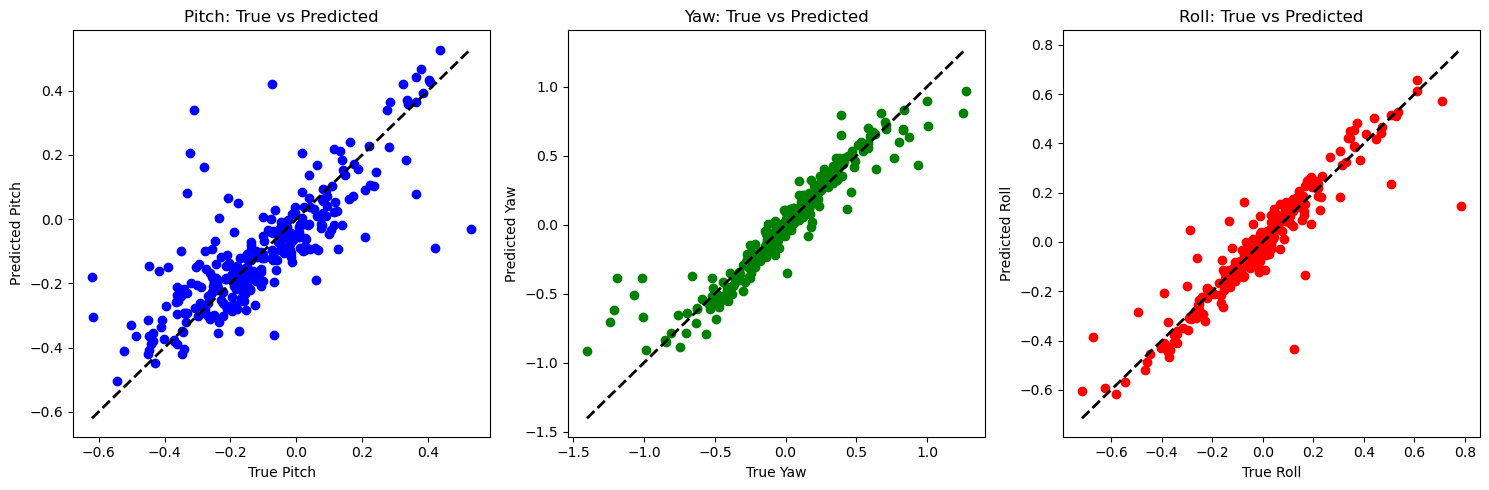

Train Pitch MSE: 0.012722991975401957
Train Yaw MSE: 0.021912952238730733
Train Roll MSE: 0.007948039831429648


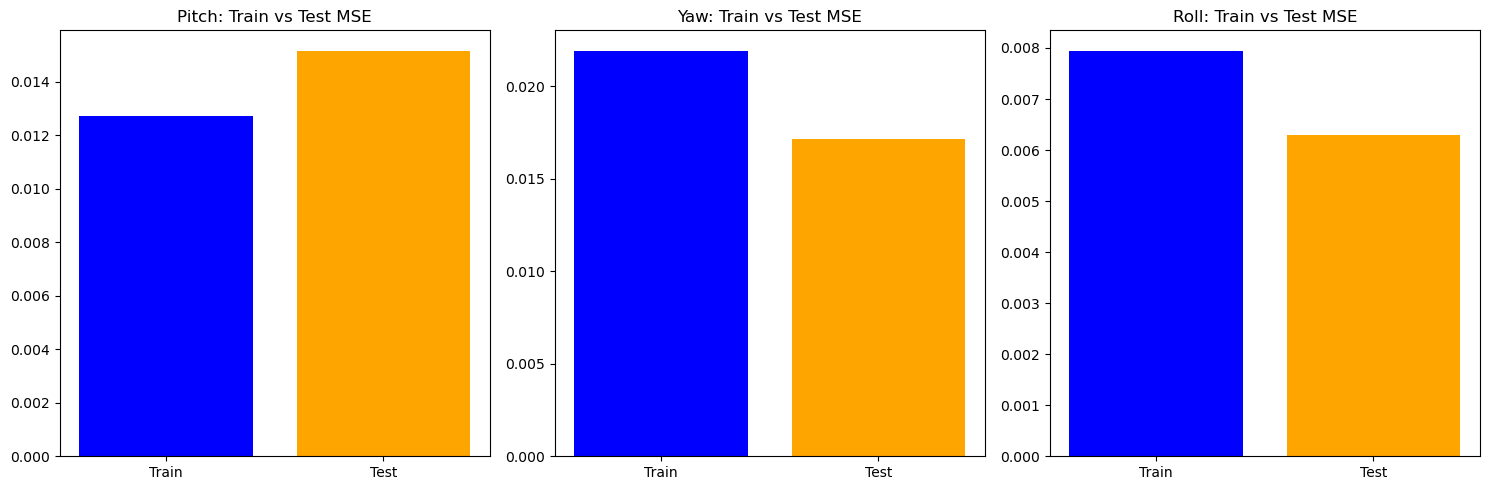

In [1]:
import os
import cv2
import numpy as np
import dlib
import scipy.io
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize dlib's face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Function to detect facial landmarks from an image
def get_landmarks(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 1)
    
    if len(rects) > 0:
        # Assuming one face per image
        shape = predictor(gray, rects[0])
        landmarks = np.array([[p.x, p.y] for p in shape.parts()])
        return landmarks.flatten()  # Flatten the landmarks into a 1D array
    else:
        return None

# Function to load data and extract features and labels
def load_data_and_extract_features(directory):
    X = []  # Feature vectors (landmarks)
    y_pitch = []  # Pitch angles
    y_yaw = []  # Yaw angles
    y_roll = []  # Roll angles
    
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            image_path = os.path.join(directory, filename)
            mat_path = os.path.join(directory, filename.replace('.jpg', '.mat'))
            
            # Check if the corresponding .mat file exists
            if os.path.exists(mat_path):
                image = cv2.imread(image_path)
                landmarks = get_landmarks(image)
                
                if landmarks is not None:
                    X.append(landmarks)
                    
                    # Load the ground truth values from the .mat file
                    mat_data = scipy.io.loadmat(mat_path)
                    pose_params = mat_data['Pose_Para'][0][:3]  # Pitch, Yaw, Roll
                    
                    y_pitch.append(pose_params[0])
                    y_yaw.append(pose_params[1])
                    y_roll.append(pose_params[2])
                    
    return np.array(X), np.array(y_pitch), np.array(y_yaw), np.array(y_roll)

# Directory containing the images and mat files
directory = '/home/ahmed/Documents/GitHub/NTI-face-pose-statment-1/DataSet'

# Load data and extract features
X, y_pitch, y_yaw, y_roll = load_data_and_extract_features(directory)

# Split data into training and testing sets
X_train, X_test, y_pitch_train, y_pitch_test = train_test_split(X, y_pitch, test_size=0.2, random_state=42)
_, _, y_yaw_train, y_yaw_test = train_test_split(X, y_yaw, test_size=0.2, random_state=42)
_, _, y_roll_train, y_roll_test = train_test_split(X, y_roll, test_size=0.2, random_state=42)

# Initialize SVM regressors for each angle
svr_pitch = SVR(kernel='rbf')
svr_yaw = SVR(kernel='rbf')
svr_roll = SVR(kernel='rbf')

# Train the regressors
svr_pitch.fit(X_train, y_pitch_train)
svr_yaw.fit(X_train, y_yaw_train)
svr_roll.fit(X_train, y_roll_train)

# Predict on the test set
y_pitch_pred = svr_pitch.predict(X_test)
y_yaw_pred = svr_yaw.predict(X_test)
y_roll_pred = svr_roll.predict(X_test)

# Evaluate the model
mse_pitch = mean_squared_error(y_pitch_test, y_pitch_pred)
mse_yaw = mean_squared_error(y_yaw_test, y_yaw_pred)
mse_roll = mean_squared_error(y_roll_test, y_roll_pred)

print(f'Pitch MSE: {mse_pitch}')
print(f'Yaw MSE: {mse_yaw}')
print(f'Roll MSE: {mse_roll}')

# Plot predicted vs actual values for each angle
plt.figure(figsize=(15, 5))

# Pitch
plt.subplot(1, 3, 1)
plt.scatter(y_pitch_test, y_pitch_pred, c='blue')
plt.plot([min(y_pitch_test), max(y_pitch_test)], [min(y_pitch_test), max(y_pitch_test)], 'k--', lw=2)
plt.xlabel('True Pitch')
plt.ylabel('Predicted Pitch')
plt.title('Pitch: True vs Predicted')

# Yaw
plt.subplot(1, 3, 2)
plt.scatter(y_yaw_test, y_yaw_pred, c='green')
plt.plot([min(y_yaw_test), max(y_yaw_test)], [min(y_yaw_test), max(y_yaw_test)], 'k--', lw=2)
plt.xlabel('True Yaw')
plt.ylabel('Predicted Yaw')
plt.title('Yaw: True vs Predicted')

# Roll
plt.subplot(1, 3, 3)
plt.scatter(y_roll_test, y_roll_pred, c='red')
plt.plot([min(y_roll_test), max(y_roll_test)], [min(y_roll_test), max(y_roll_test)], 'k--', lw=2)
plt.xlabel('True Roll')
plt.ylabel('Predicted Roll')
plt.title('Roll: True vs Predicted')

plt.tight_layout()
plt.show()

# Visualizing overfitting with train vs test loss
y_pitch_train_pred = svr_pitch.predict(X_train)
y_yaw_train_pred = svr_yaw.predict(X_train)
y_roll_train_pred = svr_roll.predict(X_train)

mse_pitch_train = mean_squared_error(y_pitch_train, y_pitch_train_pred)
mse_yaw_train = mean_squared_error(y_yaw_train, y_yaw_train_pred)
mse_roll_train = mean_squared_error(y_roll_train, y_roll_train_pred)

print(f'Train Pitch MSE: {mse_pitch_train}')
print(f'Train Yaw MSE: {mse_yaw_train}')
print(f'Train Roll MSE: {mse_roll_train}')

# Plot train vs test loss for each angle
plt.figure(figsize=(15, 5))

# Pitch
plt.subplot(1, 3, 1)
plt.bar(['Train', 'Test'], [mse_pitch_train, mse_pitch], color=['blue', 'orange'])
plt.title('Pitch: Train vs Test MSE')

# Yaw
plt.subplot(1, 3, 2)
plt.bar(['Train', 'Test'], [mse_yaw_train, mse_yaw], color=['blue', 'orange'])
plt.title('Yaw: Train vs Test MSE')

# Roll
plt.subplot(1, 3, 3)
plt.bar(['Train', 'Test'], [mse_roll_train, mse_roll], color=['blue', 'orange'])
plt.title('Roll: Train vs Test MSE')

plt.tight_layout()
plt.show()

In [ ]:
import joblib
joblib.dump(svr_pitch, 'svr_pitch_model.pkl')
joblib.dump(svr_yaw, 'svr_yaw_model.pkl')
joblib.dump(svr_roll, 'svr_roll_model.pkl')

predict the angles and classify the pose using dlib

In [ ]:
import os
import cv2
import numpy as np
import dlib
import joblib
import mediapipe as mp
import time
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Initialize dlib's face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Function to detect facial landmarks from an image
def get_landmarks(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 1)
    
    if len(rects) > 0:
        # Assuming one face per image
        shape = predictor(gray, rects[0])
        landmarks = np.array([[p.x, p.y] for p in shape.parts()])
        return landmarks.flatten()  # Flatten the landmarks into a 1D array
    else:
        return None

# Load your pre-trained SVM models
svr_pitch = joblib.load('svr_pitch_model.pkl')
svr_yaw = joblib.load('svr_yaw_model.pkl')
svr_roll = joblib.load('svr_roll_model.pkl')

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(max_num_faces=1, min_detection_confidence=0.5)

mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

# Set up tkinter root (hidden)
Tk().withdraw()

# Open file dialog to select an image
image_path = askopenfilename(title="Select an Image", filetypes=[("Image Files", "*.jpg;*.jpeg;*.png")])
if not image_path:
    print("No file selected.")
    exit()

# Read and process the selected image
image = cv2.imread(image_path)
if image is None:
    print("Error reading image.")
    exit()

# Get landmarks using dlib and predict angles using SVM models
landmarks = get_landmarks(image)
if landmarks is not None:
    pitch_pred = svr_pitch.predict([landmarks])[0]
    yaw_pred = svr_yaw.predict([landmarks])[0]
    roll_pred = svr_roll.predict([landmarks])[0]
    print(f'Predicted by SVM - Pitch: {pitch_pred:.2f}, Yaw: {yaw_pred:.2f}, Roll: {roll_pred:.2f}')
else:
    print("No face detected using dlib.")
    exit()

# Use MediaPipe to get face landmarks and calculate pose direction
start = time.time()

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_rgb.flags.writeable = False
results = face_mesh.process(image_rgb)
image_rgb.flags.writeable = True
image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

img_h, img_w, img_c = image.shape

if results.multi_face_landmarks:
    for face_idx, face_landmarks in enumerate(results.multi_face_landmarks):
        face_3d = []
        face_2d = []
        
        for idx, lm in enumerate(face_landmarks.landmark):
            if idx == 33 or idx == 263 or idx == 1 or idx == 61 or idx == 291 or idx == 199:
                if idx == 1:
                    nose_2d = (lm.x * img_w, lm.y * img_h)
                    
                x, y = int(lm.x * img_w), int(lm.y * img_h)
                
                # 2D coordinates
                face_2d.append([x, y])
                
                # 3D coordinates
                face_3d.append([x, y, lm.z])
        
        # Convert lists to numpy arrays
        face_2d = np.array(face_2d, dtype=np.float64)
        face_3d = np.array(face_3d, dtype=np.float64)
        
        # Rotation degree
        x = pitch_pred * 180 / np.pi  # Convert pitch to degrees
        y = yaw_pred * 180 / np.pi    # Invert yaw to correct the left-right direction
        z = roll_pred * 180 / np.pi   # Convert roll to degrees
        

        # Nose direction
        length = 100
        p1 = (int(nose_2d[0]), int(nose_2d[1]))
        p2 = (int(nose_2d[0] + length * np.sin(y * np.pi / 180)), 
              int(nose_2d[1] - length * np.sin(x * np.pi / 180))) 
        
        # Draw axis lines
        cv2.line(image, p1, p2, (255, 0, 0), 3)  # Blue line for nose direction
        cv2.line(image, p1, (p1[0], p1[1] + 100), (0, 255, 0), 3)  # Green line
        cv2.line(image, p1, (p1[0] + 100, p1[1]), (0, 0, 255), 3)  # Red line
        
        # # Text on image with smaller font size
        font_scale = 0.4
        thickness = 1
        
        # cv2.putText(image, text, (50, 50 + face_idx * 110), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 255), thickness)
        # cv2.putText(image, f"X: {x:.2f} Y: {y:.2f} Z: {z:.2f}", (50, 80 + face_idx * 110), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 255), thickness)
        cv2.putText(image, f"SVM Pitch: {pitch_pred:.2f}, Yaw: {yaw_pred:.2f}, Roll: {roll_pred:.2f}", (50, 110 + face_idx * 110), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 255), thickness)
    
    end = time.time()
    totalTime = end - start
    
    fps = 1 / totalTime
    print("FPS: ", fps)
    
    cv2.putText(image, f"FPS: {int(fps)}", (50, 140 + len(results.multi_face_landmarks) * 110), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 255), thickness)
    cv2.imshow("Head Pose Estimation", image)
    cv2.waitKey(0)  # Wait for a key press to close the image window

cv2.destroyAllWindows()

In [ ]:
import os
import cv2
import numpy as np
import dlib
import joblib
import mediapipe as mp
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Initialize dlib's face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Function to detect facial landmarks from an image
def get_landmarks(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 1)
    
    landmarks_list = []
    if len(rects) > 0:
        for rect in rects[:5]:  # Limit to the first 5 faces
            shape = predictor(gray, rect)
            landmarks = np.array([[p.x, p.y] for p in shape.parts()])
            landmarks_list.append(landmarks.flatten())  # Flatten the landmarks into a 1D array
        return landmarks_list
    else:
        return []

# Load your pre-trained SVM models
svr_pitch = joblib.load('svr_pitch_model.pkl')
svr_yaw = joblib.load('svr_yaw_model.pkl')
svr_roll = joblib.load('svr_roll_model.pkl')

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(max_num_faces=5, min_detection_confidence=0.2)

mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

# Set up tkinter root (hidden)
Tk().withdraw()

# Open file dialog to select a video
video_path = askopenfilename(title="Select a Video File", filetypes=[("Video Files", "*.mp4;*.avi;*.mov")])
if not video_path:
    print("No file selected.")
    exit()

# Read and process the selected video
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error opening video.")
    exit()

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Output video writer
output_video_path = os.path.splitext(video_path)[0] + "_output.avi"
out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc('M','J','P','G'), fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Get landmarks using dlib and predict angles using SVM models
    landmarks_list = get_landmarks(frame)
    if not landmarks_list:
        continue

    for landmarks in landmarks_list:
        pitch_pred = svr_pitch.predict([landmarks])[0]
        yaw_pred = svr_yaw.predict([landmarks])[0]
        roll_pred = svr_roll.predict([landmarks])[0]

        # Use MediaPipe to get face landmarks and calculate pose direction
        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(image_rgb)
        image_rgb.flags.writeable = True
        img_h, img_w, img_c = frame.shape

        if results.multi_face_landmarks:
            for face_idx, face_landmarks in enumerate(results.multi_face_landmarks):
                face_3d = []
                face_2d = []
                
                for idx, lm in enumerate(face_landmarks.landmark):
                    if idx == 33 or idx == 263 or idx == 1 or idx == 61 or idx == 291 or idx == 199:
                        if idx == 1:
                            nose_2d = (lm.x * img_w, lm.y * img_h)
                            
                        x, y = int(lm.x * img_w), int(lm.y * img_h)
                        
                        # 2D coordinates
                        face_2d.append([x, y])
                        
                        # 3D coordinates
                        face_3d.append([x, y, lm.z])
                
                # Convert lists to numpy arrays
                face_2d = np.array(face_2d, dtype=np.float64)
                face_3d = np.array(face_3d, dtype=np.float64)
                
                # Rotation degree (predicted by SVM)
                x = pitch_pred * 180 / np.pi  # Convert pitch to degrees
                y = -yaw_pred * 180 / np.pi    # Convert yaw to degrees
                z = roll_pred * 180 / np.pi   # Convert roll to degrees
                
                # Nose direction
                length = 100
                p1 = (int(nose_2d[0]), int(nose_2d[1]))
                p2 = (int(nose_2d[0] + length * np.sin(y * np.pi / 180)), 
                      int(nose_2d[1] - length * np.sin(x * np.pi / 180))) 
                
                # Draw axis lines
                cv2.line(frame, p1, p2, (255, 0, 0), 3)  # Blue line for nose direction
                cv2.line(frame, p1, (p1[0], p1[1] + 100), (0, 255, 0), 3)  # Green line
                cv2.line(frame, p1, (p1[0] + 100, p1[1]), (0, 0, 255), 3)  # Red line
                
                # Text on image with smaller font size
                font_scale = 0.4
                thickness = 1
                #cv2.putText(frame, f"SVM Pitch: {pitch_pred:.2f}, Yaw: {yaw_pred:.2f}, Roll: {roll_pred:.2f}", 
                            #(50, 50 + face_idx * 60), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 255), thickness)

    # Write the processed frame to the output video
    out.write(frame)

# Release everything
cap.release()
out.release()
cv2.destroyAllWindows()

print(f"Video saved as {output_video_path}")